In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ND = 64  # 1辺の差分分割数

In [3]:
# 濃度場計算発展の1ステップ
def step(cc):
    res = cc + dcdt(cc) * delt
    res = comp(res)
    return res

In [4]:
# 非線形拡散方程式 式(6-12)
def dcdt(cc):
    return Mc * laplacian(diff_pot(cc) - 2. * kappa * laplacian(cc))

In [5]:
# 拡散ポテンシャルの計算
def diff_pot(cc):
    return L0 * (1. - 2. * cc) + (np.log(cc) - np.log(1. - cc))

In [6]:
# 二次元のラプラシアン
def laplacian(array):
    result = -4 * array  # 元の配列の-4倍の配列を用意
    result += np.roll(array, 1, 0)  # それぞれの軸に対して-1, 1要素ずつずらした配列を足し込む(境界は周期境界)
    result += np.roll(array, -1, 0)
    result += np.roll(array, 1, 1)
    result += np.roll(array, -1, 1)
    return result

In [7]:
# 濃度場収支補正
def comp(cc):
    res = cc - (np.average(cc) - c0)  # 平均濃度の補正
    res = np.clip(res, 0.00001, 0.99999)  # 濃度変域の補正
    return res

In [8]:
# 初期濃度場の生成
def init():
    c = c0 + 0.01 * (2.0 * np.random.rand(ND, ND) - 1.0)
    return c

In [9]:
# 計算条件における定数の設定
c0 = 0.4 # 合金組成（B成分のモル分率）
al = 60.0 * 1.e-9 # 二次元計算領域一辺の長さ[m]
b1 = al / ND # 差分ブロック一辺の長さ[m]

time1 = 0 # 初期時間（実時間ではなく繰り返し回数）
time1max = 10000 # 終了時間（実時間ではなく繰り返し回数）

temp = 1000 # 時効温度[K]
rr = 8.3145 # ガス定数[J／（mol K）]
delt = 0.01 # 時間きざみ[無次元]
rtemp = rr * temp # エネルギーの規格化定数ＲＴ[J/mol]

L0 = 25000. / rtemp # 原子間相互作用パラメータ[J/mol]/RT
kappa = 5.0e-15 / b1 ** 2 / rtemp # 濃度勾配エネルギー係数[Jm^2/mol]/b1^2/RT
Mc = c0*(1.0-c0) # 原子拡散の易動度[無次元]

In [10]:
# 初期濃度場の設定
c = init()

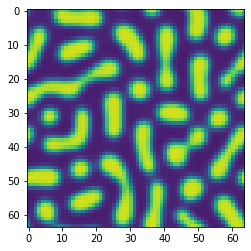

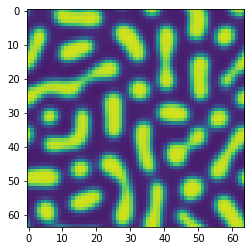

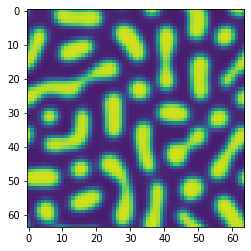

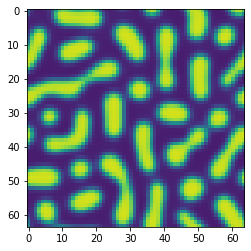

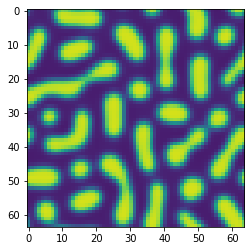

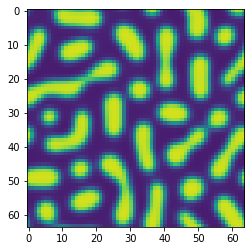

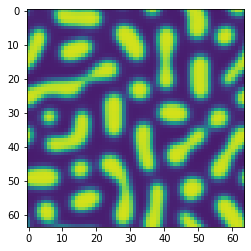

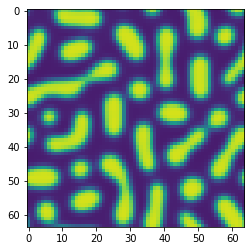

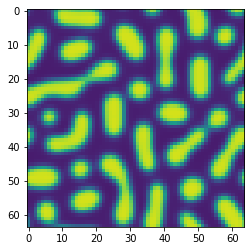

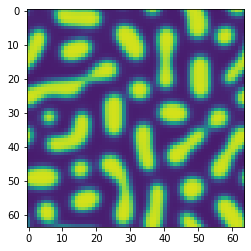

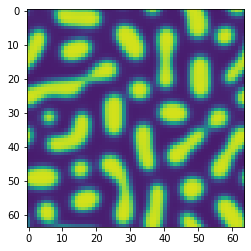

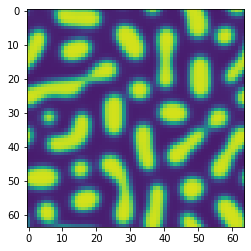

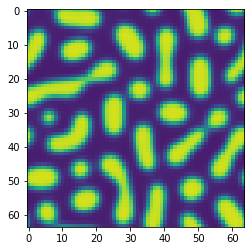

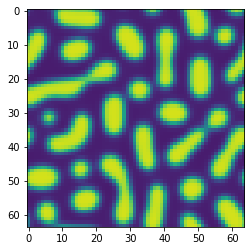

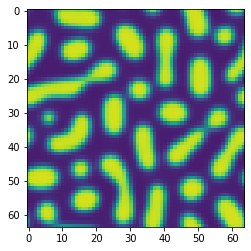

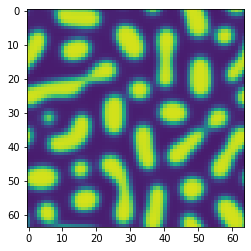

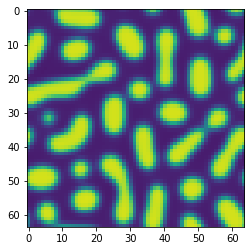

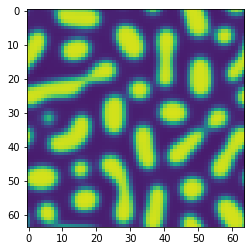

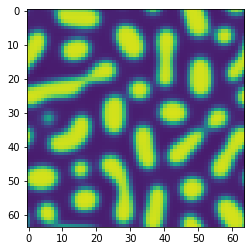

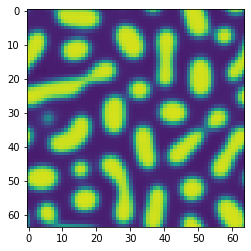

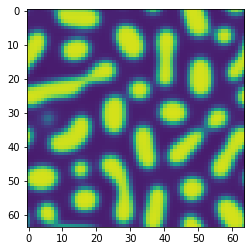

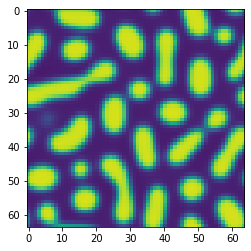

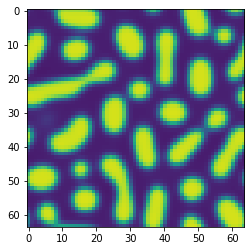

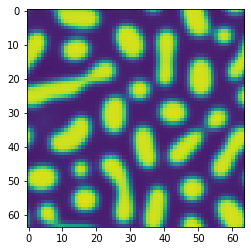

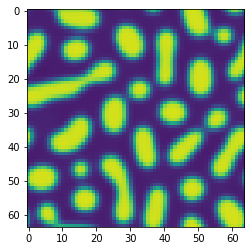

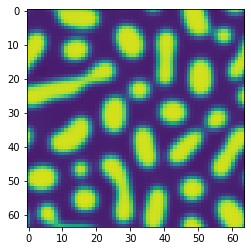

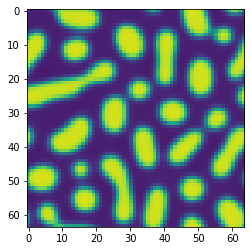

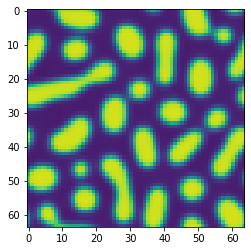

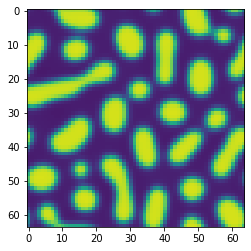

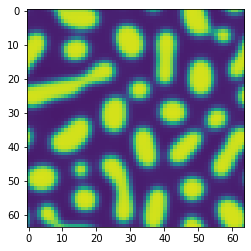

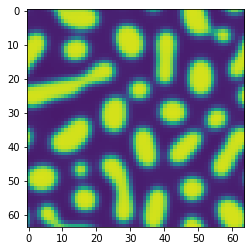

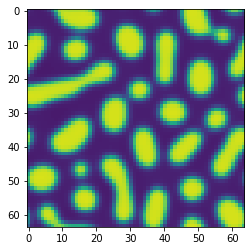

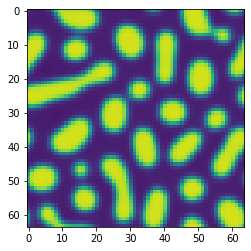

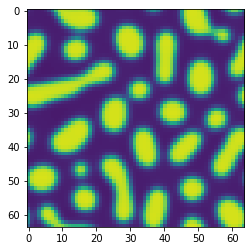

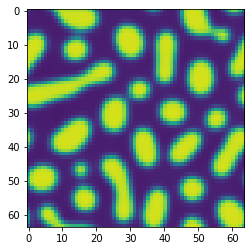

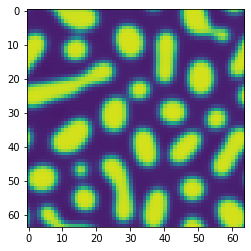

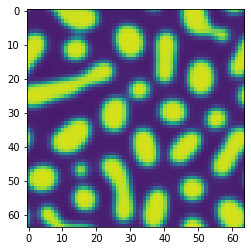

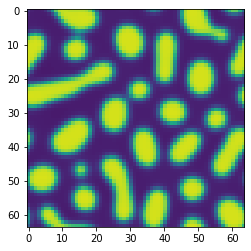

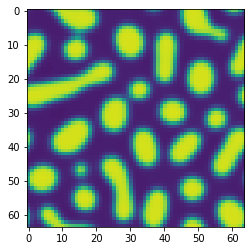

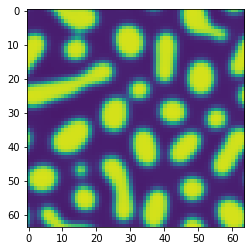

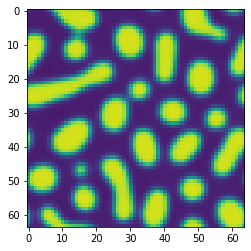

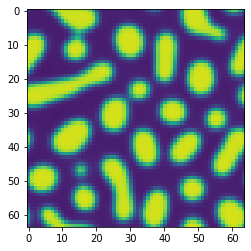

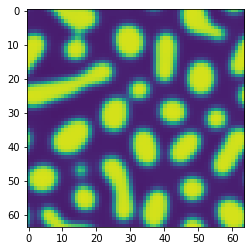

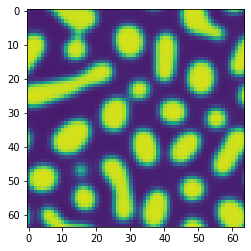

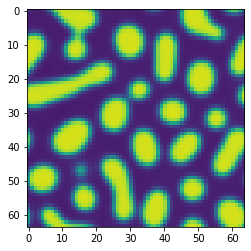

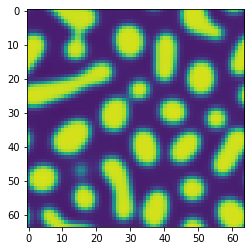

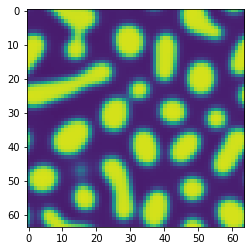

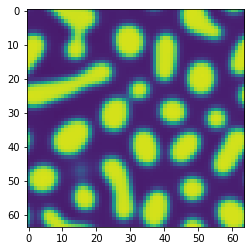

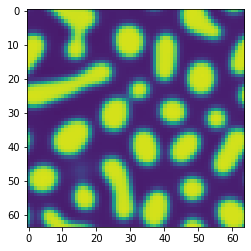

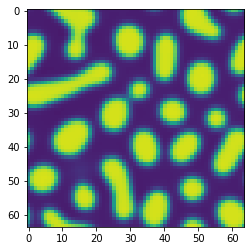

In [13]:
# 濃度場の時間発展の計算ループ
for time1 in range(time1max):
    c = step(c) # 濃度場の時間発展
# 描画
    if time1 % 200 == 0: # 200タイムステップごとに描画
        plt.clf() # 描画内容クリア
        plt.imshow(c)  # 濃度場の描画
        plt.clim(0, 1)  # カラースケールの最大、最小の設定
        plt.pause(0.01)  # 0.01秒間表示